<a href="https://colab.research.google.com/github/mohaipro/deep_learning_pytorch/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will explore various regression techniques using both **Machine Learning** and **Deep Learning** frameworks. Our focus will be on understanding and applying **Multiple Linear Regression** as the baseline model, followed by **Polynomial Regression** and other variants like **Multivariate Regression**.

We will use the **Insurance Dataset**, which includes various features like age, sex, smoking status, and region to predict the insurance charges for individuals.

This notebook will cover:
- Data preprocessing (encoding, scaling, and splitting)
- Training a **Multiple Linear Regression** model using **scikit-learn**
- Implementing a **Multiple Linear Regression** model using **PyTorch**
- Plotting results and comparing the two approaches
- Exploring more complex regression techniques like **Polynomial Regression** and **Multivariate Regression**


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

# Data Loading & Exploration (EDA)

In this section, we will load the **insurance dataset** and perform basic **Exploratory Data Analysis (EDA)**. We will check for missing values, data types, and basic statistics. Visualizations will help us understand the relationships between features and target variables.

Key tasks:
- Load the dataset
- Display the first few rows
- Check for missing data and handle it
- Get basic summary statistics for the features
- Visualize relationships between features and target


In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# Preview the dataset
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
print("dataset number of rows (samples!):", df.shape[0])
print("dataset number of columns (features + target):", df.shape[1])

dataset number of rows (samples!): 1338
dataset number of columns (features + target): 7


In [6]:
# Basic structure
print(df.shape)        # Rows and columns
print(df.columns)      # Feature names
print(df.dtypes)       # Data types

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [7]:
# Quick summary
print(df.describe())   # Stats for numerical columns
print(df.info())       # Non-null info, types

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: floa

In [16]:
# check for missing values
for col in df.columns:
    print(col,"has:",df[col].isnull().sum(),"null values")
# clean and good dataset!

age has: 0 null values
sex has: 0 null values
bmi has: 0 null values
children has: 0 null values
smoker has: 0 null values
region has: 0 null values
charges has: 0 null values


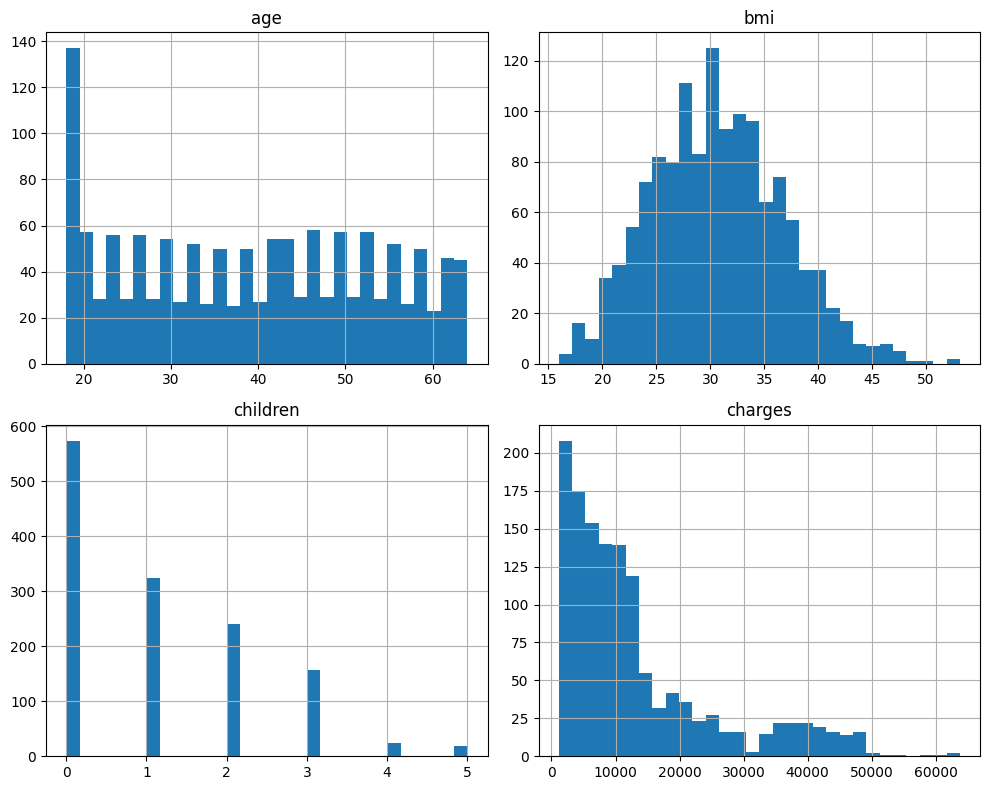

In [17]:
# Histogram of numeric features
numeric_features = ['age', 'bmi', 'children', 'charges']
df[numeric_features].hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

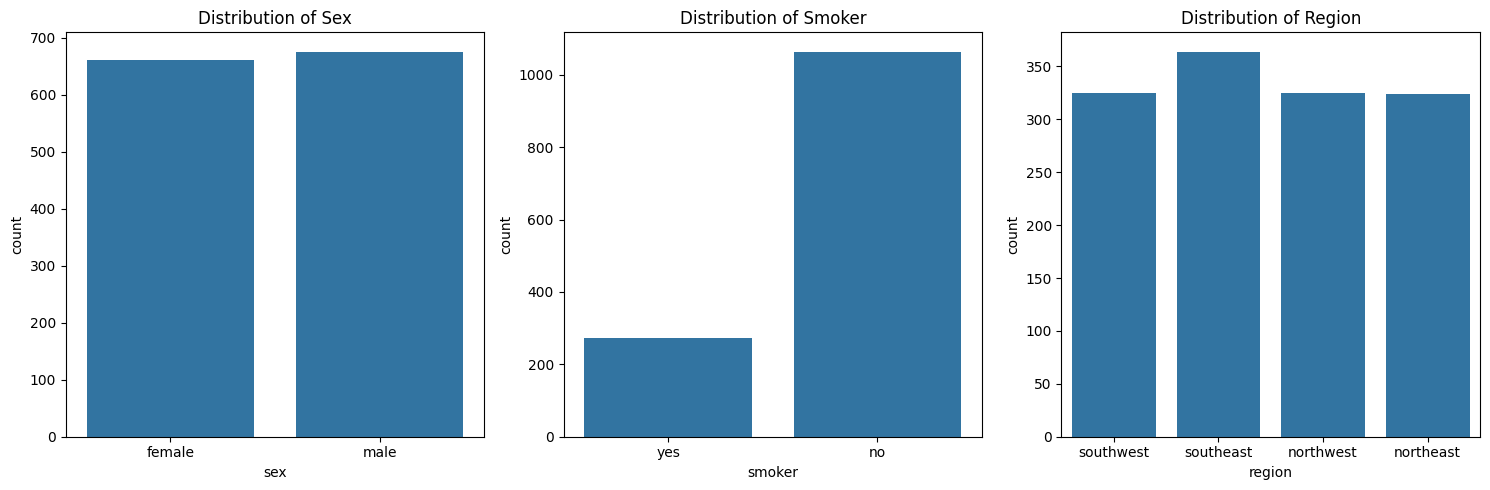

In [22]:
# List of categorical features
cat_features = ['sex', 'smoker', 'region']

# Set the figure size
plt.figure(figsize=(15, 5))

# Loop through categorical features and plot
for i, feature in enumerate(cat_features, 1):  # Starts the index at 1
    plt.subplot(1, len(cat_features), i)  # Create subplots dynamically
    sns.countplot(x=feature, data=df)
    plt.title(f"Distribution of {feature.capitalize()}")  # Add a title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

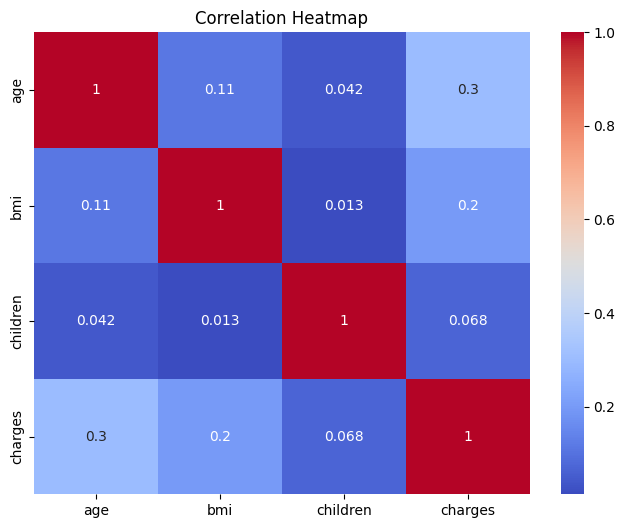

In [23]:
# Correlation between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

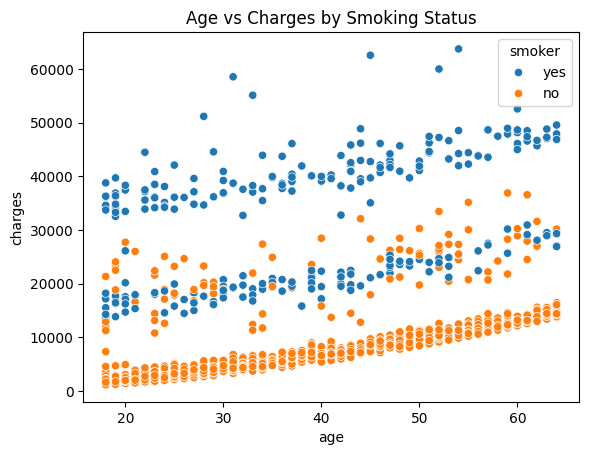

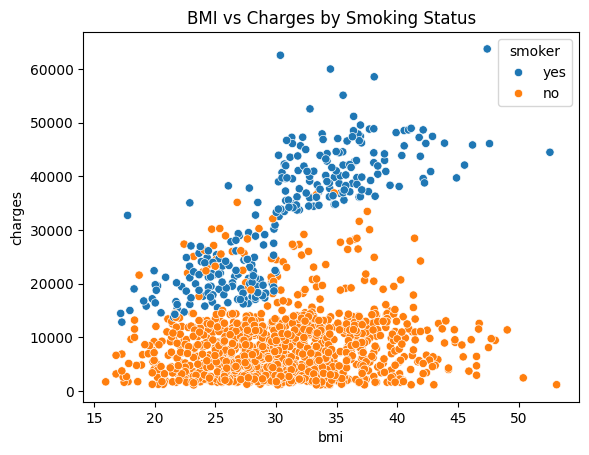

In [24]:
# Age vs Charges
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs Charges by Smoking Status')
plt.show()

# BMI vs Charges
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs Charges by Smoking Status')
plt.show()

In [26]:
import pandas as pd

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

print(df_encoded.head())
print(df_encoded.shape)

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  
(1338, 9)


# Data Preprocessing

Data preprocessing is a critical step to ensure that the dataset is ready for both **Machine Learning** and **Deep Learning** models. In this section, we will:
- Encode categorical variables using one-hot encoding
- Normalize the feature values using **StandardScaler**
- Split the dataset into **training** and **testing** sets

These steps will allow us to feed the data into models in a way that ensures optimal performance.


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# splitting the dataset
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# stardardize the data matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train shape: (1070, 8)
X_test shape: (268, 8)
y_train shape: (1070,)
y_test shape: (268,)


# Multiple Linear Regression (Scikit-learn)

We will start with a simple **Multiple Linear Regression** model using **scikit-learn** as our baseline. The steps include:
- Initializing the linear regression model
- Training the model on the preprocessed data
- Making predictions on the test set
- Evaluating the model performance using metrics like **MSE**, **MAE**, and **R²**
- Plotting the predictions vs actual values to visually assess the model's performance

This will give us a baseline to compare against the deep learning model built later.


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# instantiate the model
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# see the train and test score
print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))

mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Test MSE:", mse_test)
print("Test MAE:", mae_test)
print("Test R^2:", r2_test)

Train score: 0.7417255854683333
Test score: 0.7835929767120722
Test MSE: 33596915.851361476
Test MAE: 4181.194473753651
Test R^2: 0.7835929767120722


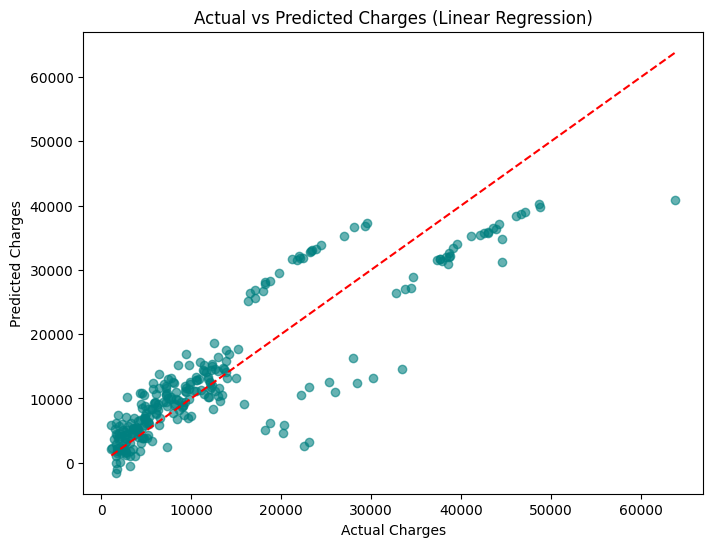

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Linear Regression)")
plt.show()

# Multiple Linear Regression (PyTorch)

In this section, we will implement the **Multiple Linear Regression** model from scratch using **PyTorch**. This will allow us to better understand the inner workings of deep learning models and how they can be applied to regression tasks.

Steps involved:
- Converting the data to **PyTorch tensors**
- Defining the **Dataset** and **DataLoader** classes
- Building a simple linear regression model
- Defining the loss function and optimizer
- Training the model using gradient descent
- Evaluating the model performance using **MSE**, **MAE**, and **R²**

This section demonstrates how to implement regression using a deep learning framework and compare its performance with the **scikit-learn** model.


In [36]:
import torch
from torch.utils.data import Dataset, DataLoader

# Convert arrays to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32).view(-1, 1)

<ipython-input-36-17ba28f65b3c>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-36-17ba28f65b3c>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
<ipython-input-36-17ba28f65b3c>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


In [39]:
print(type(X_train_tensor))
print(type(y_train_tensor))
print(type(X_test_tensor))
print(type(y_test_tensor))

print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_test_tensor.shape)
print(y_test_tensor.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([1070, 8])
torch.Size([1070, 1])
torch.Size([268, 8])
torch.Size([268, 1])


In [41]:
class insuranceDataset(Dataset):
  def __init__(self, X_data, y_data):
    self.X_data = X_data
    self.y_data = y_data
  def __len__(self):
    return len(self.X_data)
  def __getitem__(self, index):
    return self.X_data[index], self.y_data[index]

# wrap the data using the class
train_data = insuranceDataset(X_train_tensor, y_train_tensor)
test_data = insuranceDataset(X_test_tensor, y_test_tensor)

print("length of the training data:",len(train_data))
print("length of the testing data:",len(test_data))

# create data loader
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

samples, target = next(iter(train_loader))
print("number of samples in the batch:",samples.shape)
print("number of targets in the batch:",target.shape)

length of the training data: 1070
length of the testing data: 268
number of samples in the batch: torch.Size([32, 8])
number of targets in the batch: torch.Size([32, 1])


In [53]:
# defining the model
class InsuranceNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(InsuranceNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size-32)
    self.fc3 = nn.Linear(hidden_size-32, output_size)
    self.relu = nn.ReLU()

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.relu(out)
    out = self.fc3(out)
    return self.relu(out)

linear_model = InsuranceNet(input_size=X_train_tensor.shape[1], hidden_size=64, output_size=1)
print(linear_model)

InsuranceNet(
  (fc1): Linear(in_features=8, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)


In [54]:
# defining loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.001)

In [55]:
epochs = 1000 # change this value as you want -_-
losses = []
for epoch in range(epochs):
    linear_model.train()
    num_batches = 0
    total_loss = 0
    for X_batch, y_batch in train_loader:
        # Forward pass
        y_pred = linear_model(X_batch)
        loss = criterion(y_pred, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # increment the bacth
        num_batches += 1
        total_loss += loss.item()

    # Calculate average loss for the epoch
    avg_loss = total_loss / num_batches
    losses.append(avg_loss)
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
print("finished training")

Epoch [20/1000], Loss: 143201024.0000
Epoch [40/1000], Loss: 37875520.0000
Epoch [60/1000], Loss: 17286784.0000
Epoch [80/1000], Loss: 15421392.0000
Epoch [100/1000], Loss: 26555244.0000
Epoch [120/1000], Loss: 40161796.0000
Epoch [140/1000], Loss: 29630866.0000
Epoch [160/1000], Loss: 27827310.0000
Epoch [180/1000], Loss: 21261600.0000
Epoch [200/1000], Loss: 71559040.0000
Epoch [220/1000], Loss: 37551844.0000
Epoch [240/1000], Loss: 96175864.0000
Epoch [260/1000], Loss: 15128722.0000
Epoch [280/1000], Loss: 14230179.0000
Epoch [300/1000], Loss: 22924642.0000
Epoch [320/1000], Loss: 4721173.5000
Epoch [340/1000], Loss: 46948128.0000
Epoch [360/1000], Loss: 7150714.5000
Epoch [380/1000], Loss: 34779064.0000
Epoch [400/1000], Loss: 8101008.5000
Epoch [420/1000], Loss: 27188618.0000
Epoch [440/1000], Loss: 7657093.0000
Epoch [460/1000], Loss: 29745412.0000
Epoch [480/1000], Loss: 19127346.0000
Epoch [500/1000], Loss: 18041334.0000
Epoch [520/1000], Loss: 4500959.5000
Epoch [540/1000], Lo

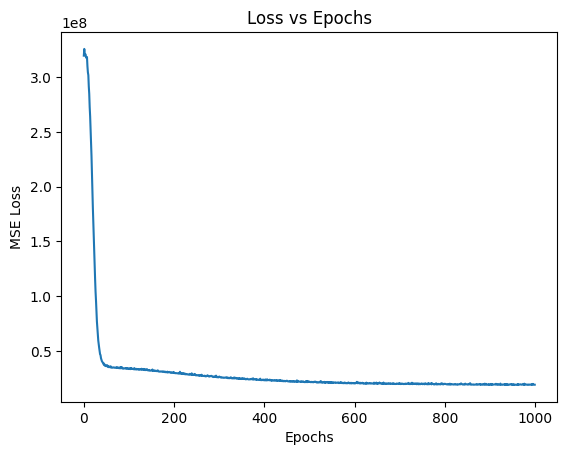

In [60]:
# plot the loss
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss vs Epochs")
plt.show()

# Evaluation and Visualization

In this section, we will evaluate both models (the **scikit-learn** and **PyTorch** models) using performance metrics and compare their predictions visually.

Tasks:
- Plotting **Actual vs Predicted** values for both models
- Evaluating the models using **MSE**, **MAE**, and **R²**
- Comparing the performance of **scikit-learn** vs **PyTorch** model

This will give us insights into how well the models are performing and whether the **Deep Learning** model is better than the **Machine Learning** model.


In [56]:
# evaluate the model
linear_model.eval()
with torch.no_grad():
    y_pred = linear_model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")
    mse = torch.mean((y_pred - y_test_tensor) ** 2).item()
    mae = torch.mean(torch.abs(y_pred - y_test_tensor)).item()
    r2 = 1 - (mse / torch.var(y_test_tensor).item())
    print(f"Test MSE: {mse:.2f}")
    print(f"Test MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")

Test Loss: 20003648.0000
Test MSE: 20003648.00
Test MAE: 2533.28
R2 Score: 0.87


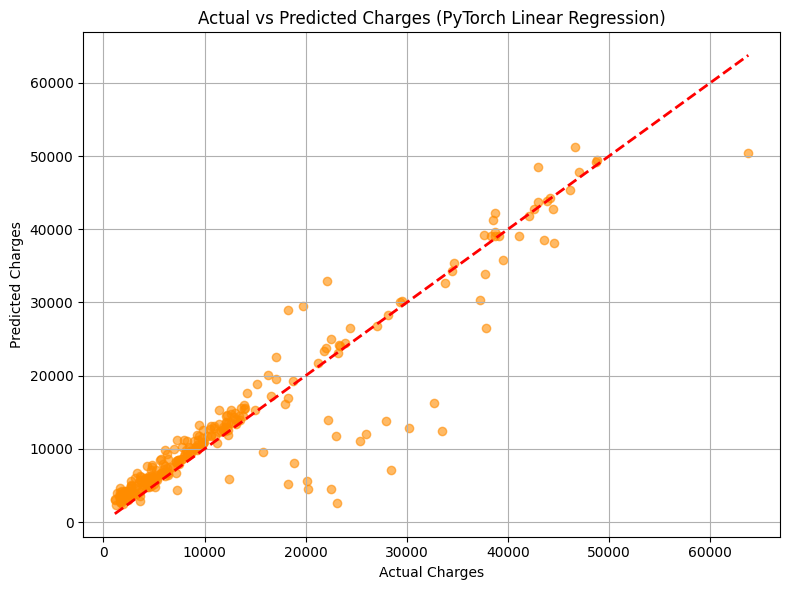

In [57]:
import matplotlib.pyplot as plt

# Convert predictions and actual values to NumPy arrays for plotting
y_pred_np = y_pred.numpy().flatten()
y_true_np = y_test_tensor.numpy().flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_true_np, y_pred_np, alpha=0.6, color='darkorange')
plt.plot([y_true_np.min(), y_true_np.max()], [y_true_np.min(), y_true_np.max()], 'r--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (PyTorch Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
# saving the model
torch.save(linear_model.state_dict(), 'linear_model.pth')
torch.save(linear_model, "complete_model.pth")

# Conclusion

In this notebook, we have:
- Implemented **Multiple Linear Regression** using both **scikit-learn** and **PyTorch**
- Explored **Polynomial Regression** and **Multivariate Regression** to handle more complex datasets
- Evaluated and compared different regression techniques

We have demonstrated how **Machine Learning** and **Deep Learning** frameworks can be applied to regression tasks, providing insights into the data and predictions.

Next steps:
- Experiment with **Regularization** techniques like **Lasso**, **Ridge**, and **ElasticNet**
- Explore **Neural Networks** for even more complex regression tasks
